# Dense Classifier

In [1]:
# data analysis pkg
import pandas as pd
import matplotlib.pyplot as plt

# Word vectorization
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# Building sequential model
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint

# import metrics
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, recall_score


# Avoiding warnings
import warnings
import os
########### Prevent Warnings ###########
warnings.filterwarnings(action='ignore')
########### Prevent Warnings ###########

Using TensorFlow backend.


# Read data

In [2]:
df = pd.read_csv('data/cleaned/data.csv')
df.title = df.title.astype('str')
df.text = df.text.astype('str')
df.comment = df.comment.astype('str')
df.rate = df.rate.astype('category')

# Setting features and Splitting dataset 

In [3]:
# features = df.columns.tolist()[:-1]
features = ['text']
label = ['verification_status']

X_train, X_test, Y_train, Y_test = train_test_split(df[features], df[label], test_size=0.3)

X_train = [text for text in X_train.text]
Y_train = [label for label in Y_train.verification_status]

X_test = [text for text in X_test.text]
Y_test = [label for label in Y_test.verification_status]

## Set hypermeter

In [9]:
output_dir='model_output/dense'

epochs = 4
batch_size = 128

n_dim = 64
n_unique_words = 5000
max_text_length = 150
pad_type = trunc_type = 'pre'

n_dense = 64
dropout = 0.5

# Tokenizing and convert text to sequences

In [10]:
tok = Tokenizer(num_words=n_unique_words, lower=False)
tok.fit_on_texts(X_train)

train_sequences = tok.texts_to_sequences(X_train)
train_sequences_matrix = pad_sequences(train_sequences, maxlen=n_unique_words)


test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=n_unique_words)

In [80]:
train_sequences_matrix.shape

(125369, 150)

In [104]:
train_sequences

[[846, 19, 10062, 328, 74, 251, 54, 26497],
 [7, 143, 7, 46, 80, 22, 44, 79, 1267, 256, 88, 123, 3],
 [1809, 96, 4272, 20, 1810, 205, 216, 20, 448, 510],
 [1619, 194, 1619, 2957, 24, 1776, 1155, 75, 1864],
 [1,
  90,
  73,
  49,
  303,
  11,
  1268,
  19,
  5,
  376,
  5,
  3969,
  688,
  1884,
  51,
  239,
  335,
  128,
  209,
  49,
  295,
  18451,
  302,
  108],
 [1825, 1563, 3489, 156, 66, 578, 75, 2523, 2, 10, 9, 3133, 37016, 11],
 [13,
  23,
  414,
  15,
  439,
  490,
  3328,
  475,
  154,
  594,
  382,
  647,
  175,
  3,
  382,
  5,
  114,
  49,
  414,
  286,
  703,
  776,
  3,
  382,
  24,
  115,
  12,
  779,
  7,
  3970,
  134,
  50,
  382,
  34,
  17,
  21,
  56,
  34,
  105,
  647,
  3,
  34,
  225,
  30,
  320,
  50,
  36,
  5,
  34,
  7,
  4016,
  677,
  188,
  21,
  56,
  109,
  17,
  3727,
  295,
  6,
  215,
  53,
  225,
  24,
  2172,
  37],
 [2958, 110, 2028, 754, 8877, 130, 208, 13632, 3085, 32, 4762, 4, 42],
 [37017, 3277, 969, 15, 17, 37, 52],
 [15,
  17,
  960,
  115

# Designing Model Architecture

In [82]:
def DNN():
    model = Sequential()
    model.add(Embedding(n_unique_words, n_dim, input_length=max_text_length))
    model.add(Flatten())
    model.add(Dense(n_dense, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [83]:
model = DNN()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 150, 64)           6400000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                614464    
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 7,014,529
Trainable params: 7,014,529
Non-trainable params: 0
_________________________________________________________________


# Configure Model

In [84]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_ckpt = ModelCheckpoint(filepath=output_dir+'weights.{epoch:02d}.hdf5')

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Train

In [87]:
model.fit(train_sequences_matrix, Y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          verbose=1, 
          validation_data=(test_sequences_matrix, Y_test), callbacks=[model_ckpt])

Train on 125369 samples, validate on 53730 samples
Epoch 1/4
125369/125369 [==============================] - 78s 626us/step - loss: 0.4624 - accuracy: 0.8329 - val_loss: 0.4532 - val_accuracy: 0.8329
Epoch 2/4
125369/125369 [==============================] - 79s 628us/step - loss: 0.3854 - accuracy: 0.8462 - val_loss: 0.5245 - val_accuracy: 0.8095
Epoch 3/4
125369/125369 [==============================] - 80s 638us/step - loss: 0.2117 - accuracy: 0.9176 - val_loss: 0.7168 - val_accuracy: 0.7649
Epoch 4/4
125369/125369 [==============================] - 80s 641us/step - loss: 0.1441 - accuracy: 0.9458 - val_loss: 0.9345 - val_accuracy: 0.7625


# Evaluate

In [95]:
model.load_weights(output_dir+'/weights.02.hdf5')

In [96]:
y_hat = model.predict_proba(test_sequences_matrix)

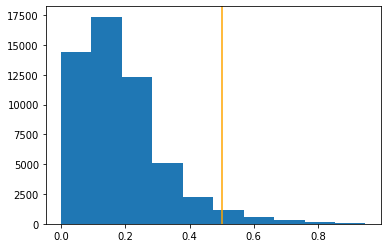

In [101]:
plt.hist(y_hat)
_ = plt.axvline(x=.5, color='orange')

In [103]:
auc = roc_auc_score(Y_test, y_hat)*100.0
print(auc)

49.94229386221398
